In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Turn down for faster convergence
train_size = 5000
test_size = 2000

In [23]:
### load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_size,test_size=test_size,random_state = 111)



In [31]:
# scale data to have zero mean and unit variance 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




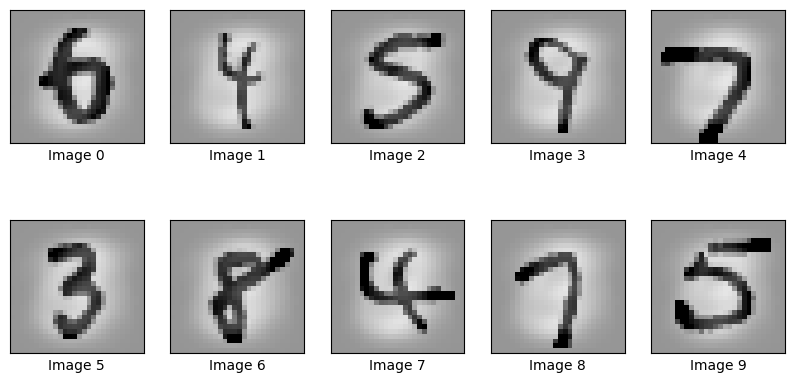

In [34]:
scale = np.max(abs(X_train))
plt.figure(figsize=(10, 5))
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(X_train[i,:].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin= -2, vmax=2)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Image '+ str(i))
plt.show()

In [35]:
clfCV = LogisticRegressionCV(cv = 5, multi_class = "multinomial", random_state = 111, solver = 'saga',penalty = 'l2',tol = 0.1, max_iter = 1000,n_jobs=-1)
clfCV.fit(X_train,y_train)
score = clfCV.score(X_test,y_test)
print(score)

0.90855


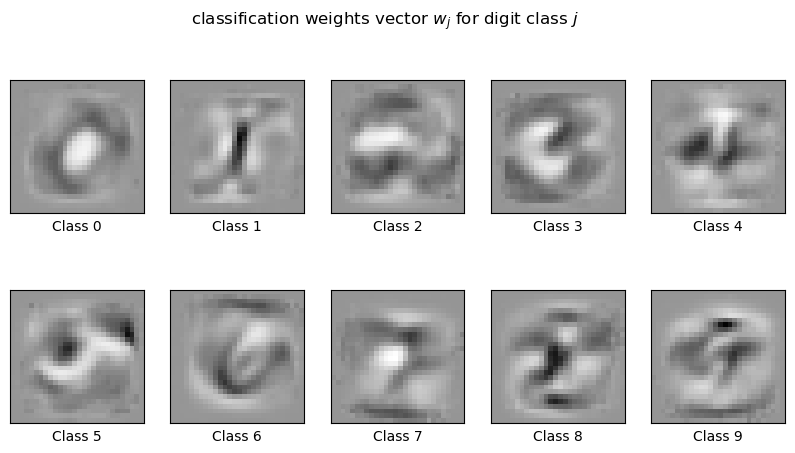

In [37]:
# plot weights vs the pixel position
coef = clfCV.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('classification weights vector $w_j$ for digit class $j$')

plt.show()

